<a href="https://colab.research.google.com/github/GraceWangui/House-Price-Prediction/blob/master/Real_estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1:Uploading data files
from google.colab import files
uploaded =files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
# To confirm we have the files
# Get access to the data in the google drive using a dictionary
#returns a dictionary of the files which were uploaded. The dictionary is keyed by the file name and values are the data which were uploaded.

for fn in uploaded.keys():
 print ('User uploaded file "{name}" with length {length} bytes'.format ( name=fn, length=len(uploaded[fn])))


User uploaded file "test.csv" with length 451405 bytes
User uploaded file "train.csv" with length 460676 bytes


In [ ]:
# To see the records
import pandas as pd
import io
from io import StringIO
import string
df_train = pd.read_csv (io.StringIO(uploaded['train.csv'].decode('utf-8')))
print(df_train.head())

   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]


In [ ]:

df_test = pd.read_csv (io.StringIO(uploaded['test.csv'].decode('utf-8')))
print(df_test.head())

     Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]


In [10]:
df_train.rename(columns={'MSSubclass': 'HouseType'})
df_train.rename(columns={'MSZoning': 'AreaZone'})
df_train.rename(columns={'BldgType': 'BuildingType'})
df_train.rename(columns={'YearRemodAdd': 'RemodelDate'})
df_train.rename(columns={'RoofMatl': 'RoofMaterial'})
df_train.rename(columns={'Exterior1st': 'ExteriorCovering'})
df_train.rename(columns={'MasVnrType': 'MasonryVeneerType'})
df_train.rename(columns={'MasVnrArea': 'MasonryVeneerArea'})
df_train.rename(columns={'BsmtQual': 'BasementQuality'})
df_train.rename(columns={'BsmtCond': 'BasementCondition'})
df_train.rename(columns={'BsmtExposure': 'BasementExposure'})
df_train.rename(columns={'HeatingQC': 'HeatingQualityCondition'})
df_train.rename(columns={'GrLivArea': 'GroundLivingArea'})
df_train.rename(columns={'Functional': 'HomeFunctionality'})
df_train.rename(columns={'FireplaceQu': 'FireplaceQuality'})
df_train.rename(columns={'MiscFeature': 'MiscellaneousFeatures'})
df_train.rename(columns={'MiscVal': 'MiscellaneousValue'})
df_train.rename(columns={'Fence': 'FenceQuality'})
df_train.rename(columns={'PoolQC': 'PoolQuality'})
df_train.rename(columns={'PavedDrive': 'PavedDriveway'})
df_train.rename(columns={'GarageQual': 'GarageQuality'})
df_train.rename(columns={'GarageCond': 'GarageCondition'})
df_train.rename(columns={'GarageYrBlt': 'GarageYrBuilt'})
df_train.rename(columns={'FireplaceQu': 'FireplaceQuality'})
df_train.rename(columns={'KitchenQual': 'KitchenQuality'})
df_train.rename(columns={'BsmtHalfBath': 'BasementHalfBath'})
df_train.rename(columns={'BsmtFullBath': 'BasementFullBath'})


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BasementFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,10

In [ ]:

# Missing values counts in each column

missing_count =(df_train.isnull().sum() / len(df_train)) * 100

# Filter to  get columns with missing count > 0

missing_count = missing_count[missing_count > 0]
print = (missing_count)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


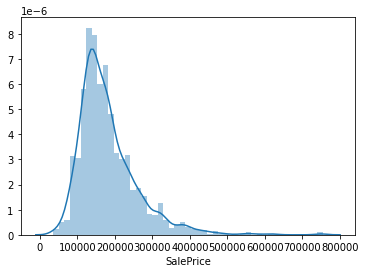

In [ ]:
import seaborn as sns
sns.distplot(df_train['SalePrice'])

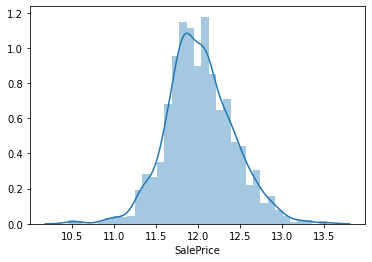

In [ ]:
# From the above axis we see that the data is not normally distributed instead it is right skewed. This is to imply, the mean is typically greater than the median. 
#the Sale Price deviates from normal distribution and shows peakedness
# Solve by taking log scale to transform target variable : Sale Price


import numpy as np
target = np.log(df_train['SalePrice'])
sns.distplot(target)

In [ ]:
# Finding numerical feautures

numeric_data = df_train.select_dtypes (include= [np.number])

#Find categorical feauture

categorical_data = df_train.select_dtypes (exclude= [np.number])

# Print number of categorical and numerical feautures
print = ('There are {0}  numerical feautures  and {1} categorical feautures in the trainind data'.\
          format(numeric_data.shape[1], categorical_data.shape[1]))
print

'There are 38  numerical feautures  and 43 categorical feautures in the trainind data'

In [ ]:
# Because the id column in the numerical data is not giving additional/new info we remove it.

del numeric_data ['Id']
numeric_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

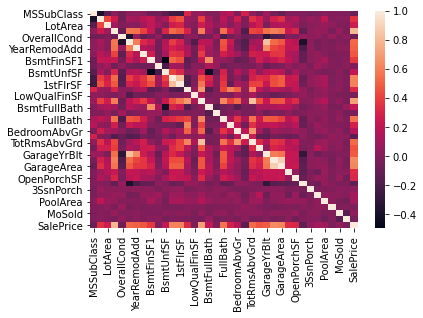

In [ ]:
# Correlation among columns in numerical data
corr = numeric_data.corr()

# Plot the correlation matrix
sns.heatmap (corr)



In [ ]:
# Explanation of graph
# The light colored pixels show the features that are closely/highly correlated with other feautures.
# The lighter the color themore the feautures are correlated.

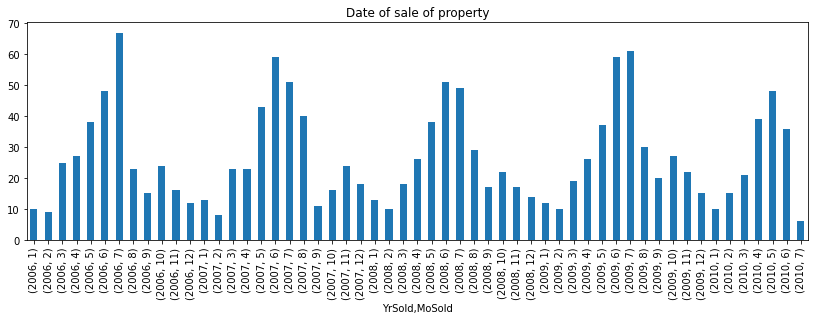

In [ ]:
#Descriptive analysis
#Year and month house was sold.(check when demand is high)

import matplotlib.pyplot as plt
%matplotlib inline

df_train.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar',figsize=(14,4))
plt.title("Date of sale of property")
plt.show()


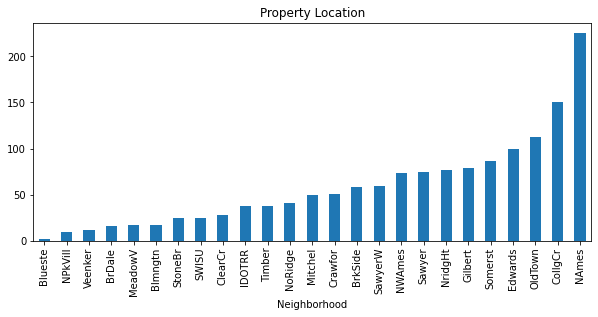

In [ ]:
#Analysis of location of property
#Location with most property.



df_train.groupby(['Neighborhood']).Id.count().\
   sort_values().\
   plot(kind='bar',figsize=(10,4))
plt.title("Property Location")
plt.show()



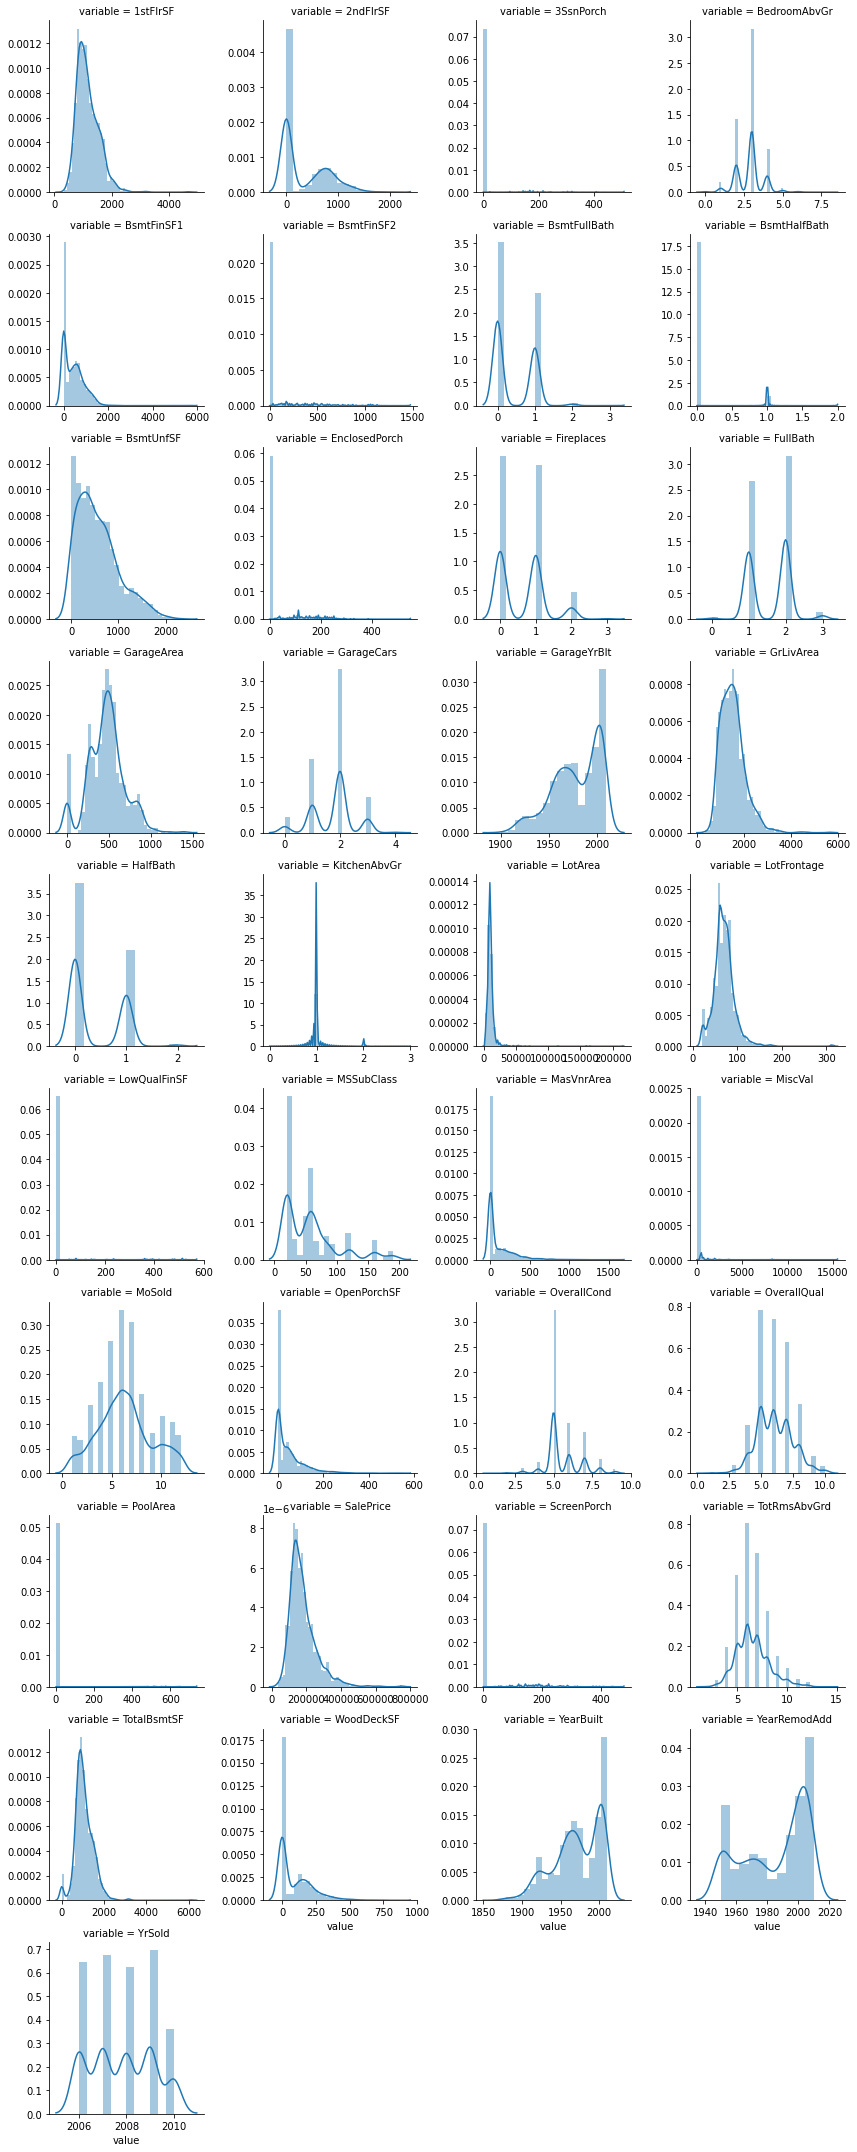

In [ ]:
#Distribution of Numerical feautures

f=pd.melt(df_train, value_vars=sorted(numeric_data))
g= sns.FacetGrid(f, col='variable', col_wrap=4 ,sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [ ]:
# Conversion from numerical feautures to categorical feautures.
df_train ['MSSubClass'] = df_train.MSSubClass.apply(lambda x: str(x))
df_train ['MoSold'] = df_train.MoSold.apply(lambda x: str(x))
df_train ['YrSold'] = df_train.YrSold.apply(lambda x: str(x))

In [ ]:
 #From the distributions we conclude, some numerical feautures behave as categorical feautures as their graphs are not fully continous
 #Some features e.g pool area and YrSold have bars to show the values are not continous as such but discrete.
 #Hence inclined to categorical features (numerical feautures that behave as categorical features).
 #Therefore, converrt the numerical feautures to categorical data

Central Tendecy measures

In [ ]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df_train.mean()

Id               7.305000e+02
MSSubClass                inf
LotFrontage      7.004996e+01
LotArea          1.051683e+04
OverallQual      6.099315e+00
OverallCond      5.575342e+00
YearBuilt        1.971268e+03
YearRemodAdd     1.984866e+03
MasVnrArea       1.036853e+02
BsmtFinSF1       4.436397e+02
BsmtFinSF2       4.654932e+01
BsmtUnfSF        5.672404e+02
TotalBsmtSF      1.057429e+03
1stFlrSF         1.162627e+03
2ndFlrSF         3.469925e+02
LowQualFinSF     5.844521e+00
GrLivArea        1.515464e+03
BsmtFullBath     4.253425e-01
BsmtHalfBath     5.753425e-02
FullBath         1.565068e+00
HalfBath         3.828767e-01
BedroomAbvGr     2.866438e+00
KitchenAbvGr     1.046575e+00
TotRmsAbvGrd     6.517808e+00
Fireplaces       6.130137e-01
GarageYrBlt      1.978506e+03
GarageCars       1.767123e+00
GarageArea       4.729801e+02
WoodDeckSF       9.424452e+01
OpenPorchSF      4.666027e+01
EnclosedPorch    2.195411e+01
3SsnPorch        3.409589e+00
ScreenPorch      1.506096e+01
PoolArea  

In [ ]:
df_train.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [ ]:
#Analyzing the sale price
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
#Minimum Sale Price > 0.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<function matplotlib.pyplot.show>

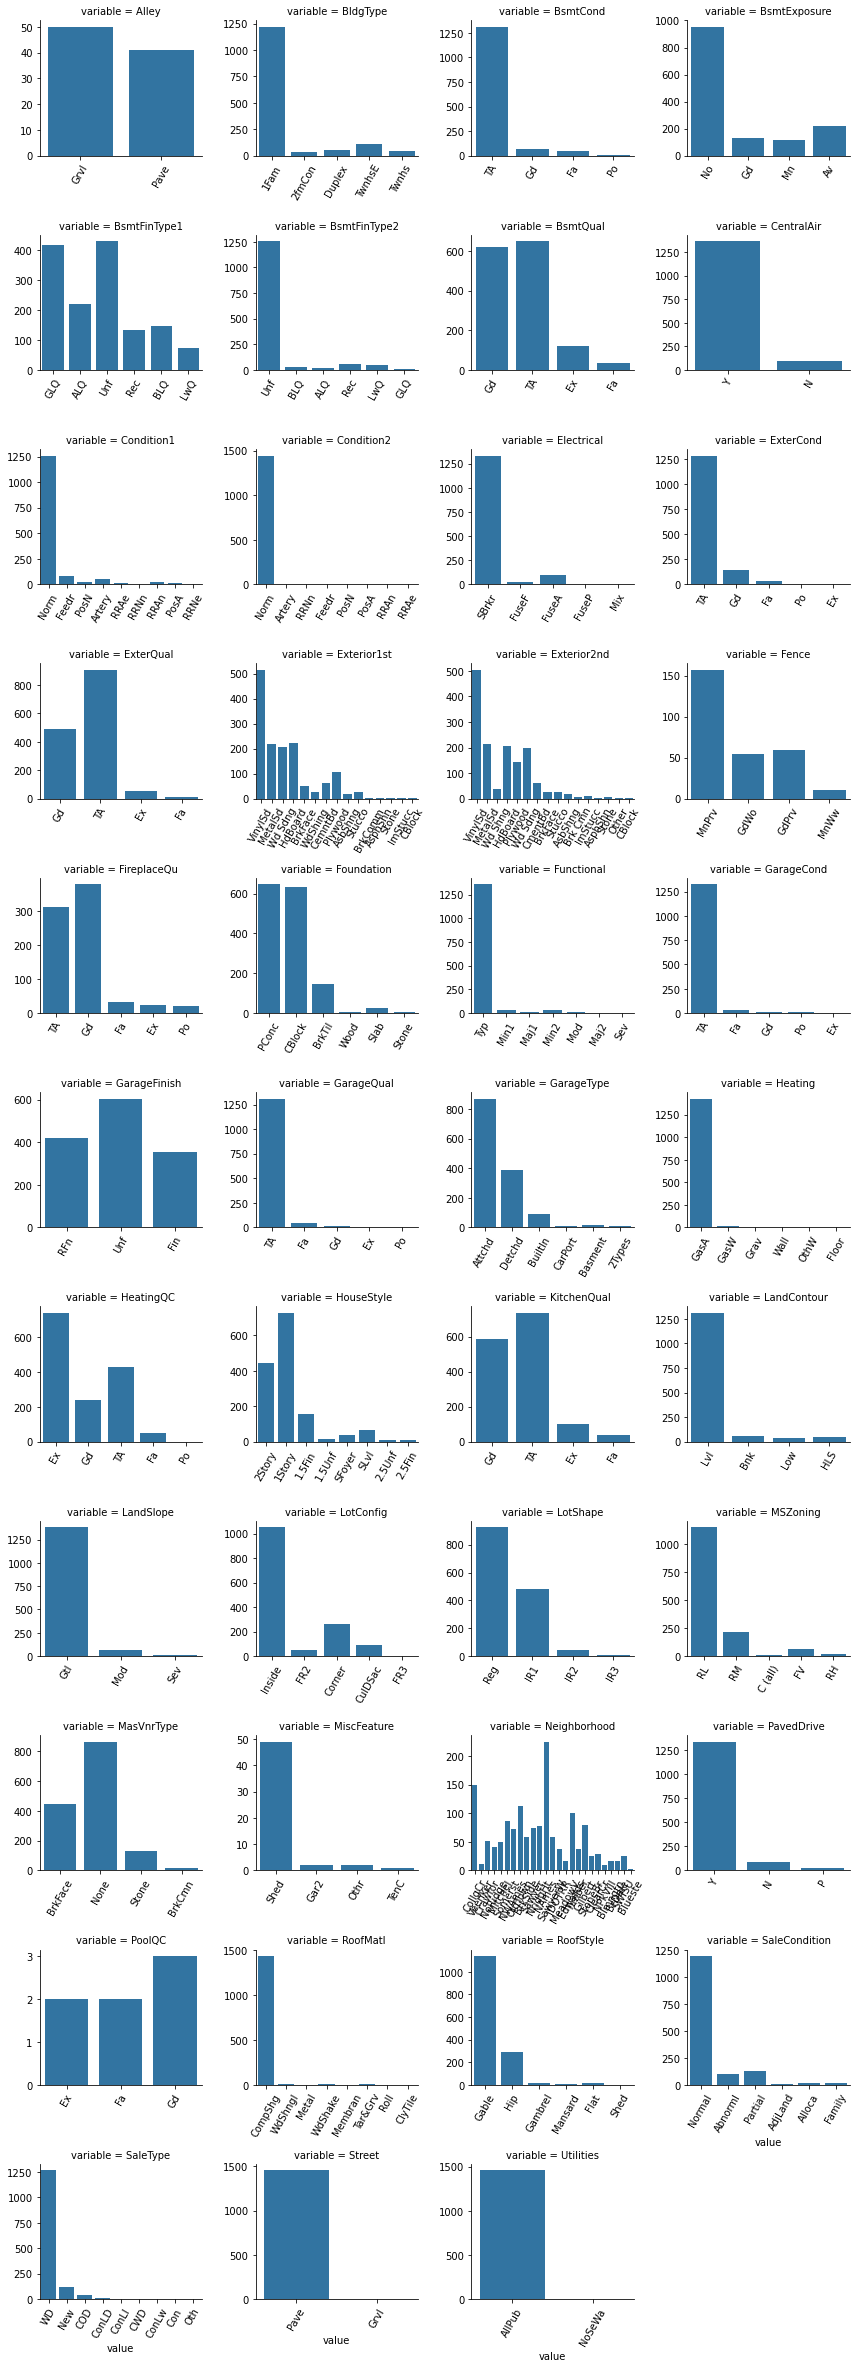

In [ ]:
# count of categorical features(distribution)
f=pd.melt(df_train, value_vars=sorted(categorical_data))
g= sns.FacetGrid(f, col='variable', col_wrap=4 ,sharex=False, sharey=False)
plt.xticks  (rotation ='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(),rotation =60)for ax in g.axes.flat]
g.fig.tight_layout()
plt.show

In [ ]:
# Convert categorical variables to nummerical variables.
# Cat variables converted- (Rating.)


In [ ]:
df_train = df_train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [ ]:
cat_to_num_feautres = ["Alley" ,"BsmtCond",  "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtQual",  "ExterCond", "ExterQual", "FireplaceQu" , "Functional", "GarageCond" ,"GarageQual", "HeatingQC","KitchenQual", "LandSlope", "LotShape", "PavedDrive", "PoolQC", "Street", "Utilities"]

df_train [cat_to_num_feautres]= df_train[cat_to_num_feautres].fillna(0)

In [ ]:
# Box plot for analysis of means of categorical feautures.
#Relationship/Co relation with sales price.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<function matplotlib.pyplot.show>

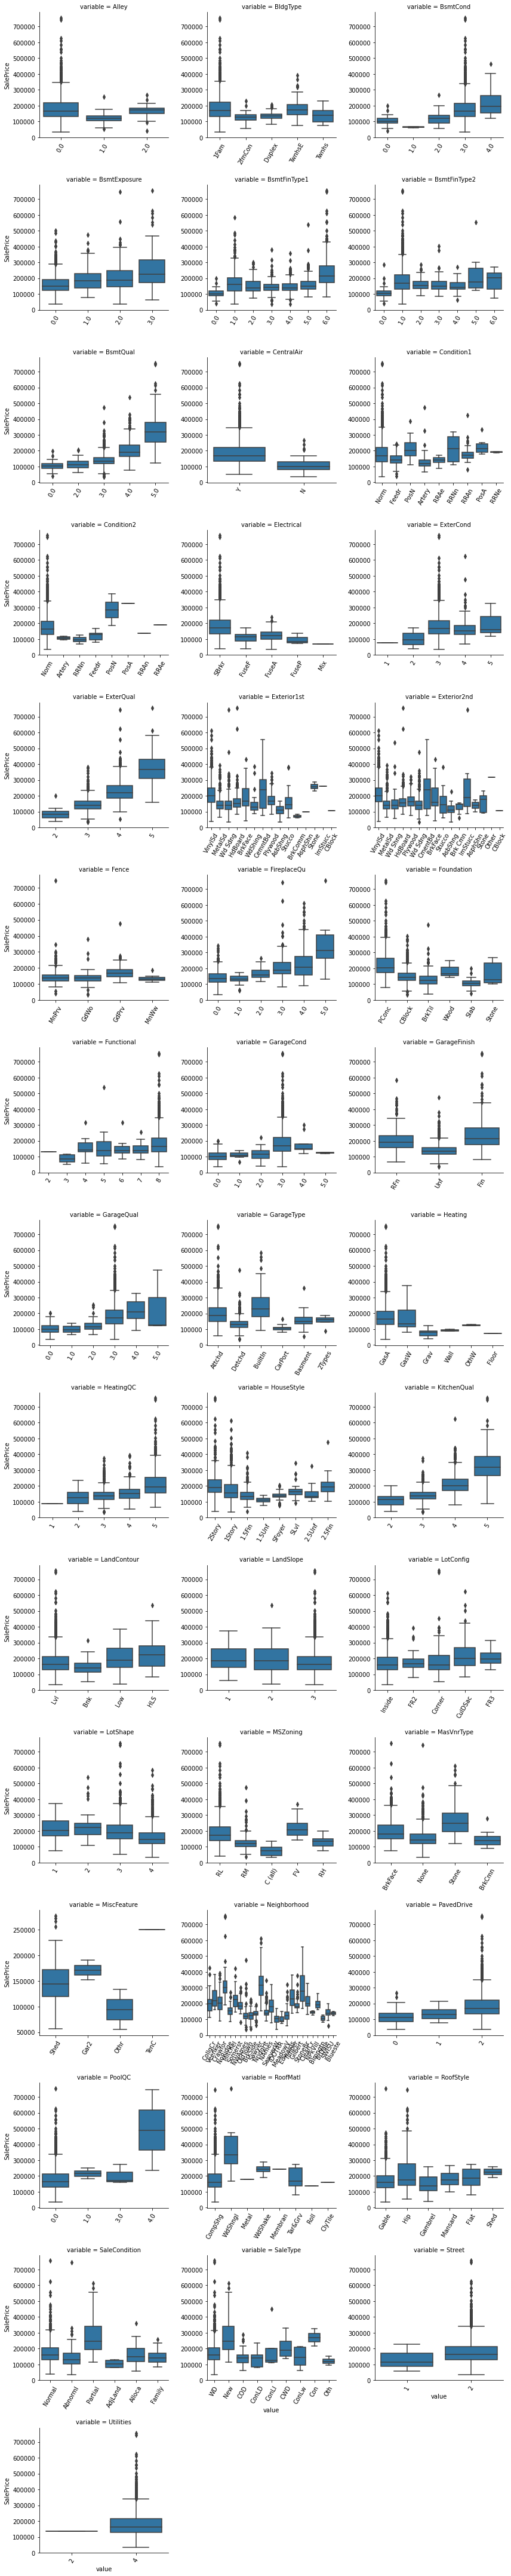

In [ ]:
f=pd.melt(df_train, id_vars = ['SalePrice'] , value_vars=sorted(categorical_data))
g= sns.FacetGrid(f, col='variable', col_wrap=3 ,sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice' )
[plt.setp(ax.get_xticklabels(),rotation =60)for ax in g.axes.flat]
g.fig.tight_layout()
plt.show

In [ ]:
#Observation
#Feautures e.g Neighbourhood, MS subclass variables have a huge difference between their means.
#Have an impact on the Sale price.

In [ ]:
#Anova method for easier analysis
#Calculate the p value and determine whether to reject or accept the null hyothesis.
#Null hypothesis: All the feautures are equally important
#p< 0.05 (reject null hypothesis)

In [ ]:
import scipy.stats
cat_features = categorical_data.columns
#fill nulls with 'missing' data.
df_train[cat_features] = df_train[cat_features].fillna('Missing')

anova= {'feature' : [], 'f':[], 'p' : []}
for cat in cat_features:
  group_prices = []
  for group in df_train[cat].unique():
    group_prices.append(df_train [df_train[cat] == group] ['SalePrice'].values)
  f , p = scipy.stats.f_oneway(*group_prices)
  anova['feature'].append(cat)
  anova['f'].append(f)
  anova ['p'].append(p)
anova =pd.DataFrame(anova)





In [ ]:
anova

,feature,f,p
0,MSZoning,43.840282,8.817634e-35
1,Street,2.459290,1.170486e-01
2,Alley,15.176614,2.996380e-07
3,LotShape,40.132852,6.447524e-25
4,LandContour,12.850188,2.742217e-08
5,Utilities,0.298804,5.847168e-01
6,LotConfig,7.809954,3.163167e-06
7,LandSlope,1.958817,1.413964e-01
8,Neighborhood,71.784865,1.558600e-225
9,Condition1,6.118017,8.904549e-08


In [ ]:
anova.sort_values ('p', inplace=True)

In [ ]:
anova
#p< 0.05

,feature,f,p
8,Neighborhood,71.784865,1.558600e-225
18,ExterQual,443.334831,1.439551e-204
21,BsmtQual,316.148635,8.158548e-196
30,KitchenQual,407.806352,3.032213e-192
34,GarageFinish,213.867028,6.228747e-115
32,FireplaceQu,121.075121,2.971217e-107
20,Foundation,100.253851,5.791895e-91
33,GarageType,80.379992,6.117026e-87
24,BsmtFinType1,64.688200,2.386358e-71
27,HeatingQC,88.394462,2.667062e-67


In [ ]:
#Neighbourhood, ExtQuality, BSsmtQuality influence sale price heavily.

<function matplotlib.pyplot.show>

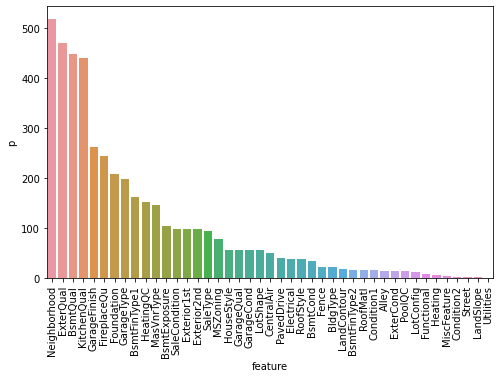

In [ ]:
plt.figure(figsize= (8,5))
sns.barplot(anova.feature, np.log(1./anova ['p']))
plt.xticks (rotation = 90)
plt.show

In [ ]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
SalePrice,0,0.0
BsmtQual,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0
BsmtCond,0,0.0


In [ ]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

In [ ]:
missing_data = df_train.isnull().sum() / df_train.shape[0]
missing_data

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 78, dtype: float64

In [ ]:
#check for duplication in train data
print=('Train set duplicate IDs :{}'.format(df_train.duplicated('Id').sum()))
print

'Train set duplicate IDs :0'

In [ ]:
##check for duplication in test data
print=('Test set duplicate IDs :{}'.format(df_test.duplicated('Id').sum()))
print

'Test set duplicate IDs :0'

In [ ]:
# Finding numerical feautures

numeric_data = df_train.select_dtypes (include= [np.number])

#Find categorical feauture

categorical_data = df_train.select_dtypes (exclude= [np.number])

# Print number of categorical and numerical feautures
print = ('There are {0}  numerical feautures  and {1} categorical feautures in the trainind data'.\
          format(numeric_data.shape[1], categorical_data.shape[1]))
print

'There are 52  numerical feautures  and 26 categorical feautures in the trainind data'

In [ ]:
df_train.drop(df_train[df_train.GrLivArea >= 4000].index, inplace = True)

In [ ]:
#feature engineering
#sum some columns to one columns
df_train['TotalSF'] =df_train.TotalBsmtSF + df_train.GrLivArea
df_train['TotalFloorSF'] =df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train['TotalPorchSF'] =df_train.OpenPorchSF + df_train.EnclosedPorch + df_train['3SsnPorch'] +df_train['ScreenPorch']  

In [ ]:
#Boolean features(Yes-no)
df_train['HasBasement'] = df_train.TotalBsmtSF.apply(lambda x: 1 if x>0 else 0)
df_train['HasGarage'] = df_train.GarageArea.apply(lambda x: 1 if x>0 else 0)
df_train['HasPorch'] = df_train.TotalPorchSF.apply(lambda x: 1 if x>0 else 0)
df_train['HasPool'] = df_train.PoolArea.apply(lambda x: 1 if x>0 else 0)
df_train['WasRemodelled'] = (df_train.YearRemodAdd != df_train.YearBuilt).astype(np.int64)
df_train['IsNew'] = (df_train.YearBuilt > 2000).astype(np.int64)
df_train['WasCompleted'] = (df_train.SaleCondition !='Partial').astype(np.int64)



In [ ]:
#store new columns in  a list
boolean_features =['HasBasement','HasGarage','HasPorch','HasPool','WasRemodelled', 'IsNew', 'WasCompleted']

In [ ]:
# Finding numerical feautures

numeric_data = df_train.select_dtypes (include= [np.number])

#Find categorical feauture

categorical_data = df_train.select_dtypes (exclude= [np.number])

# Print number of categorical and numerical feautures
print = ('There are {0}  numerical feautures  and {1} categorical feautures in the trainind data'.\
          format(numeric_data.shape[1], categorical_data.shape[1]))

num_features = numeric_data.columns
cat_features = categorical_data.columns
print

'There are 62  numerical feautures  and 26 categorical feautures in the trainind data'

In [ ]:
#features not in boolean features
num_features = [f for f in num_features if f not in boolean_features]

In [ ]:
# log transformation
# one hot encoding for handling categorical features
# data modelling - lasso regression, ridge regression kind of analysis


In [ ]:
pip install pandas==0.23.4

In [ ]:
#log transformation on all numerical feautures including SalePrice
#most numerical features are skewed
#.loc Access a group of rows and columns by label(s)
#Return the natural logarithm of one plus the input array

features =num_features + ['SalePrice']
for f in features:
   df_train.loc[:,f] = np.log1p(df_train[f])

In [ ]:
#assign saleprice to variable , then drop id and sale price.
#data seperation, features in one data frame
y = df_train ['SalePrice']
df_train.drop ('SalePrice', axis =1 , inplace= True)
df_train.drop ('Id', axis=1, inplace =True)

#Get dummies one hot encoding method
#convert categorical variable into dummy/indicator variables.
#regular regression on model data (train data)
model_data = pd.get_dummies(df_train).copy()
model_data.head()

,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,...,Fence_Missing,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,9.042040,1.098612,0.0,1.609438,1.609438,1.386294,2.079442,1.791759,7.602900,7.602900,1.609438,1.386294,1.609438,1.386294,0.000000,1.945910,6.561031,0.693147,0.0,5.017280,6.753438,1.791759,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,1.609438,2.197225,2.197225,0.000000,0.000000,1.098612,6.308098,1.386294,...,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,9.169623,1.098612,0.0,1.609438,1.609438,1.386294,1.945910,2.197225,7.589336,7.589336,1.386294,1.386294,1.609438,1.386294,1.386294,1.791759,6.886532,0.693147,0.0,5.652489,7.141245,1.791759,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,1.098612,0.000000,1.386294,0.693147,1.386294,1.945910,2.197225,0.693147,1.386294,1.098612,6.133398,1.386294,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,9.328212,1.098612,0.0,1.386294,1.609438,1.386294,2.079442,1.791759,7.601902,7.602401,1.609438,1.386294,1.609438,1.386294,0.693147,1.945910,6.188264,0.693147,0.0,6.075346,6.825460,1.791759,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,1.609438,1.945910,2.197225,0.693147,1.386294,1.098612,6.411818,1.386294,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,9.164401,1.098612,0.0,1.386294,1.609438,1.386294,2.079442,1.791759,7.557995,7.586296,1.386294,1.386294,1.386294,1.609438,0.000000,1.791759,5.379897,0.693147,0.0,6.293419,6.629363,1.609438,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,0.693147,0.000000,1.386294,0.693147,1.609438,2.079442,2.197225,0.693147,1.609438,1.386294,6.466145,1.386294,...,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,9.565284,1.098612,0.0,1.386294,1.609438,1.386294,2.197225,1.791759,7.601402,7.601402,1.609438,1.386294,1.609438,1.386294,1.098612,1.945910,6.486161,0.693147,0.0,6.196444,7.044033,1.791759,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,1.098612,0.693147,1.609438,0.693147,1.609438,2.302585,2.197225,0.693147,1.386294,1.386294,6.729824,1.386294,...,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
#split train for train and test...0.7, 0.3
#model_data(train), test csv(validation set)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(model_data.copy(), y, test_size =0.3, random_state=42)

In [ ]:
#original 1500 records
#train
print = ('X_train:', X_train.shape)
print

('X_train:', (1019, 266))

In [ ]:
print = ('X_val:', X_test.shape)
print

('X_val:', (437, 266))

In [ ]:
#test
print = ('y_train:', y_train.shape)
print

('y_train:', (1019,))

In [ ]:
print = ('y_val:', y_test.shape)
print

('y_val:', (437,))

In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler
#remove id and saleprice from num_features
#num_features.remove('Id')
#num_features.remove('SalePrice')

#Standardize numerical features
#mean 0 and unit variance

stdsc = StandardScaler()
X_train.loc[:, num_features] = stdsc.fit_transform(X_train[num_features])
X_test.loc[:,num_features] = stdsc.transform (X_test[num_features])

#standardizing numerical features, not dummy features

In [ ]:
#loss/error function(prediction features are reduced as much as possible-- rmse
from sklearn.model_selection import cross_val_score
def rmse (model, X, y):
  cv_scores = -cross_val_score(model, X, y, scoring = 'neg_mean_squared_error', cv=10)
  return np.sqrt(cv_scores)

In [ ]:
#reduce number of features using lasso to reduce no.of columns
#consider most important features

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def rmse (model, X, y):
  cv_scores = -cross_val_score(model, X, y, scoring = 'neg_mean_squared_error', cv=10)
  return np.sqrt(cv_scores)

param_grid= {'alpha': [0.0001, 0.001, 0.01, 1., 5., 10., 25.,], 'max_iter' :[50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring = 'neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']

#Hone in 

param_grid= {'alpha': [x/100. * alpha for x in range(50, 150, 5)], 'max_iter' :[50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring = 'neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']
lasso = lasso.best_estimator_

train_rmse=format(rmse(lasso, X_train, y_train).mean(), '.5f')
test_rmse=format(rmse(lasso, X_test, y_test).mean(), '.5f')
alpha_value=format(alpha, '.5f')
print=(train_rmse)
print


# print(f'Lasso -> Train RMSE: {train_rmse:.5f} | Test RMSE: {test_rmse:.5f} | alpha: {alpha_value:.5f}')

'0.00884'

In [ ]:
print=(test_rmse)
print

'0.00943'

In [ ]:
print=(alpha_value)
print

'0.00006'

In [ ]:
#train_rsme and test_rsme are almost equal meaning there is overfitting
#memorize entire data set instead of learning and finding a pattern or the data
#drop some features using lasso

In [ ]:
import seaborn as sns
coefs = pd.DataFrame({'coefs': lasso.coef_,'Positive': lasso.coef_> 0}, index= X_train.columns)
coefs['coefs_abs'] = np.abs(coefs.coefs)
print =('LASSO droped {} of {} features.'.format(
    sum(coefs.coefs == 0), coefs.shape[0]))
print

#168 features no major influence on sale price

'LASSO droped 168 of 266 features.'

<function matplotlib.pyplot.show>

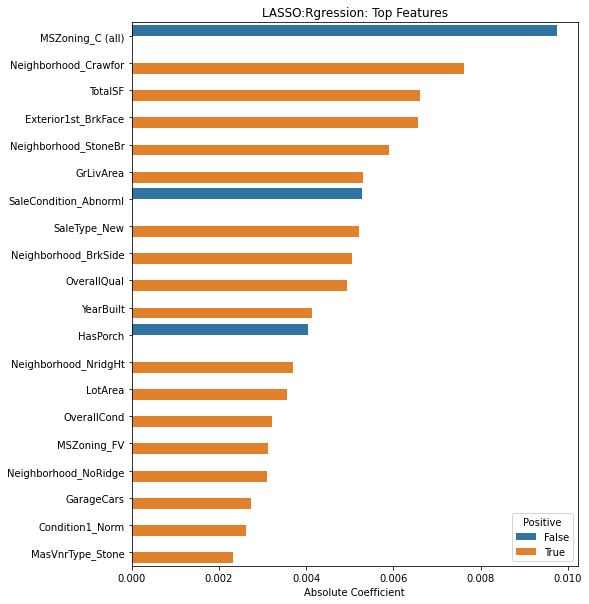

In [ ]:
#plot features with much more importancein predicting house price
top_coefs = coefs.sort_values ('coefs_abs', ascending= False).head(20)
plt.figure(figsize = (8,10))
sns.barplot(top_coefs.coefs_abs, top_coefs.index, orient= 'h',hue=top_coefs.Positive)
plt.title('LASSO:Regression: Top Features')
plt.xlabel('Absolute Coefficient')
plt.show

In [ ]:
#XGBoost machine learning library.

import xgboost as xgb
#set standard parameters
regr = xgb.XGBRegressor (colsample_bytree = 0.2,
                         gamma =0.0,
                         learning_rate = 0.05,
                         max_depth =6,
                         min_child_weight =1.5,
                         n_estimator = 7200,
                         reg_alpha =0.9,
                         reg_lambda= 0.6,
                         subsample=0.2,
                         seed = 42,
                         silent=1)
#top_coefs.index ...important features, 266-168 features
#does the learning
regr.fit(X_train[top_coefs.index], y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0.0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1.5, missing=None, n_estimator=7200,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.9, reg_lambda=0.6, scale_pos_weight=1,
             seed=42, silent=1, subsample=0.2, verbosity=1)

In [ ]:
from sklearn.metrics import mean_squared_error
def rmse (y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test,y_pred))

# run prediction on training set to get an idea of how well it does
y_pred = regr.predict(X_test[top_coefs.index])

print =("XGBoost score on training set :", rmse(y_test,  y_pred))
print

('XGBoost score on training set :', 0.026794537884848167)

In [ ]:
#TODO
#plot the prediction values 
#use other models/libraries ...random forest.
#rename columns
#document milestones